In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

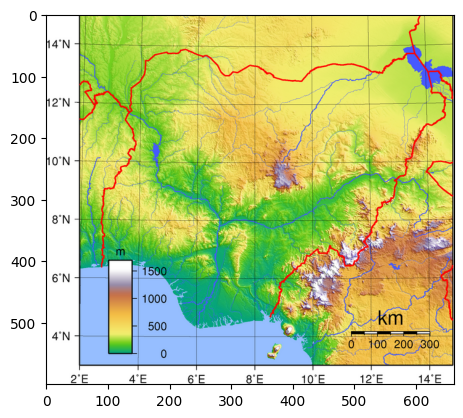

In [2]:
image=('/content/Nigeria_Topography.png')
image=cv2.imread(image)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [3]:
image.shape

(600, 662, 3)

In [4]:
pixel_values=image.reshape(-1,3)
pixel_values.shape

(397200, 3)

In [5]:
pixel_values=np.float32(pixel_values)

In [6]:
pixel_values

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

In [7]:
from sklearn.cluster import KMeans

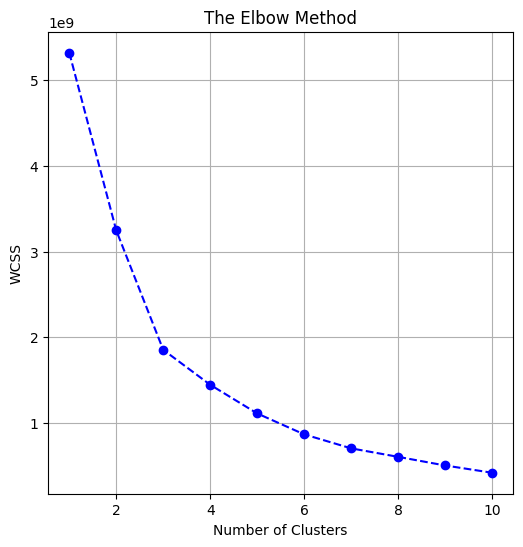

In [9]:
wcss = []

# Calculate WCSS for different number of clusters
for i in range(1, 11):  # Testing for clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pixel_values)  # Fit the model to your dataset
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS value)

# Plotting the Elbow Method graph
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  # Adds markers and lines for clarity
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [10]:
# Define the number of clusters(k)
k=3
#Apply k-means clustering
kmeans=KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=0)
kmeans.fit(pixel_values)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [11]:
# Get the cluster centers
centers=np.uint8(kmeans.cluster_centers_)

In [12]:
# Map each pixel to its closest cluster center
labels=kmeans.labels_

In [13]:
# Reshape labels back to its original image dimension
segmented_image=centers[labels.flatten()]
segmented_image=segmented_image.reshape(image.shape)


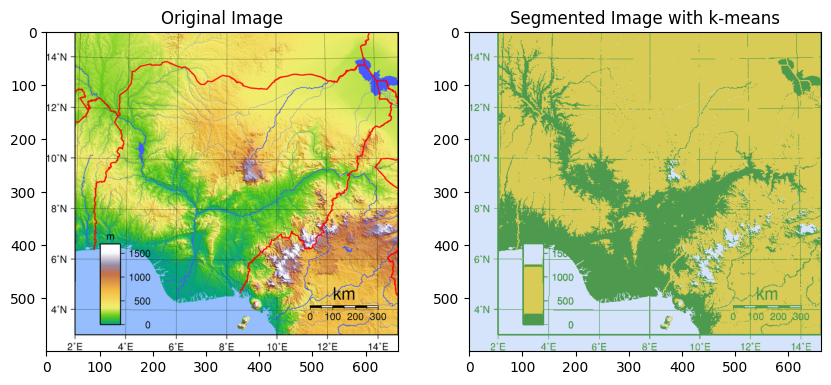

In [14]:
# Dsplay the Original and Segmente Images
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)


plt.subplot(1,2,2)
plt.title('Segmented Image with k-means')
plt.imshow(segmented_image)


plt.show()